**Importing all the necessary libraries**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
df = pd.read_csv('C:\\Users\\91701\\Downloads\\Fish.csv')

In [88]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [89]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [90]:
df.shape

(159, 7)

In [91]:
df.size

1113

In [92]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [93]:
df.info()  #information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [94]:
df.ndim

2

**Statistics of the data**

In [95]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Data Cleaning

**Let us check whether it is having any null values are not**

In [96]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [97]:
df.isna().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

# Exploratory Data Analysis

In [98]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [99]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [100]:
df['Length1'].mean()

26.24716981132075

In [101]:
df['Length2'].mean()

28.415723270440253

**Correlation of features**

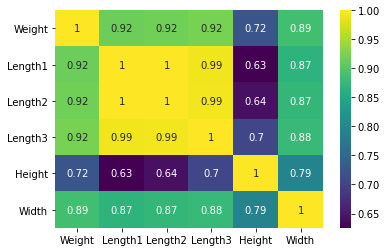

In [102]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

**Here we are observed that Length1,Length2,Length3 are highly correlated so let us eliminate or delete 2 column**

**Here we are trying to create a generalized model so if are not deleting one of it then small change in one can effect other and model results fluctuate significantly**

In [103]:
df.drop(columns=['Length2','Length3'],inplace=True)

In [104]:
df.head()

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


In [105]:
df.shape

(159, 5)

In [106]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [107]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<BarContainer object of 7 artists>

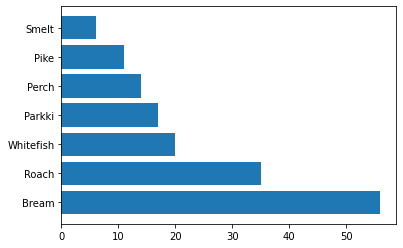

In [108]:
plt.barh(df['Species'].unique(),df['Species'].value_counts())

**Here we have to convert the categorical column to numerical and we are going to use LabelEncoding and we have to beaware of Dummy trap.**

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
label = LabelEncoder()

In [111]:
df.Species = label.fit_transform(df.Species)

In [112]:
df.tail(20)

,Species,Weight,Length1,Height,Width
139,3,770.0,44.8,7.6800,5.3760
140,3,950.0,48.3,8.9262,6.1712
141,3,1250.0,52.0,10.6863,6.9849
142,3,1600.0,56.0,9.6000,6.1440
143,3,1550.0,56.0,9.6000,6.1440
144,3,1650.0,59.0,10.8120,7.4800
145,5,6.7,9.3,1.7388,1.0476
146,5,7.5,10.0,1.9720,1.1600
147,5,7.0,10.1,1.7284,1.1484
148,5,9.7,10.4,2.1960,1.3800


In [113]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Height     0
Width      0
dtype: int64

**Now We can build the model**

**We are going to use Multiple Linear Regression**

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [115]:
model = LinearRegression()

In [116]:
df1 = df.copy()
y = df1.pop('Weight')

In [117]:
x = df1.iloc[:,:4]

In [118]:
x.shape

(159, 4)

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=56)

In [120]:
model.fit(x_train,y_train) 

LinearRegression()

In [121]:
y_pred_test = model.predict(x_test)

**Let us measure the score or performance of the model**

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.8701561458169792